In [6]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Set the path to the directory containing the CSV files
path = r"C:\Users\viren\OneDrive\Desktop\IIT-MADARAS(GUVI)\data\data_Singapore\data RFP"

df = pd.concat([pd.read_csv(file) for file in glob.glob(os.path.join(path, '*.csv'))], ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
952532,2025-02,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1100888.0,62 years
952533,2025-04,YISHUN,EXECUTIVE,877,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,988000.0,61 years 09 months
952534,2025-04,YISHUN,EXECUTIVE,828,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,975000.0,61 years 09 months
952535,2025-05,YISHUN,EXECUTIVE,828,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,1000000.0,61 years 09 months


In [10]:
df.storey_range.unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '46 TO 48',
       '43 TO 45', '49 TO 51', '06 TO 10', '01 TO 05', '11 TO 15',
       '16 TO 20', '21 TO 25', '26 TO 30', '36 TO 40', '31 TO 35'],
      dtype=object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952537 entries, 0 to 952536
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                952537 non-null  object 
 1   town                 952537 non-null  object 
 2   flat_type            952537 non-null  object 
 3   block                952537 non-null  object 
 4   street_name          952537 non-null  object 
 5   storey_range         952537 non-null  object 
 6   floor_area_sqm       952537 non-null  float64
 7   flat_model           952537 non-null  object 
 8   lease_commence_date  952537 non-null  int64  
 9   resale_price         952537 non-null  float64
 10  remaining_lease      243487 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 79.9+ MB


In [12]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [13]:
df.nunique()

month                   425
town                     27
flat_type                 8
block                  2743
street_name             592
storey_range             25
floor_area_sqm          221
flat_model               34
lease_commence_date      56
resale_price           9913
remaining_lease         737
dtype: int64

In [14]:
df.drop('remaining_lease',axis=1,inplace=True)

In [15]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952537 entries, 0 to 952536
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                952537 non-null  object 
 1   town                 952537 non-null  object 
 2   flat_type            952537 non-null  object 
 3   block                952537 non-null  object 
 4   street_name          952537 non-null  object 
 5   storey_range         952537 non-null  object 
 6   floor_area_sqm       952537 non-null  float64
 7   flat_model           952537 non-null  object 
 8   lease_commence_date  952537 non-null  int64  
 9   resale_price         952537 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 72.7+ MB


In [17]:
categorical_features = [col for col in df.columns if df[col].dtype == 'object']
numerical_features = [col for col in df.columns if df[col].dtype != 'object']

In [18]:
for col in categorical_features:
    print(col, '-', len(df[col].unique()))
    

month - 425
town - 27
flat_type - 8
block - 2743
street_name - 592
storey_range - 25
flat_model - 34


In [19]:
for num in numerical_features:
    print(num, '-', len(df[num].unique()))

floor_area_sqm - 221
lease_commence_date - 56
resale_price - 9913


In [20]:
df.drop(['block','street_name'],axis=1,inplace=True)

In [21]:
df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976,47200.0


In [22]:
df['year'] = df['month'].apply(lambda x: int(str(x)[:4]))
df['month'] = df['month'].apply(lambda x: int(str(x)[-2:]))

In [23]:
df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year
0,1,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,1990
1,1,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0,1990
2,1,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000.0,1990
3,1,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000.0,1990
4,1,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990


In [24]:
df.year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2015, 2016, 2013, 2014, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024, 2025])

In [25]:
df.month.unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [28]:
df.isna().sum()

month                  0
town                   0
flat_type              0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
year                   0
dtype: int64

<Axes: xlabel='floor_area_sqm', ylabel='resale_price'>

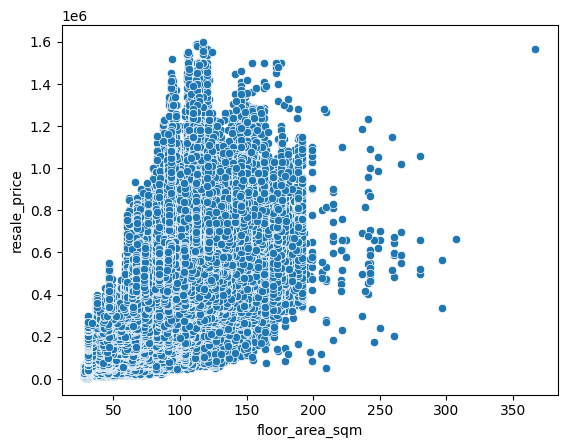

In [29]:
sns.scatterplot(data=df, x = 'floor_area_sqm', y = 'resale_price')

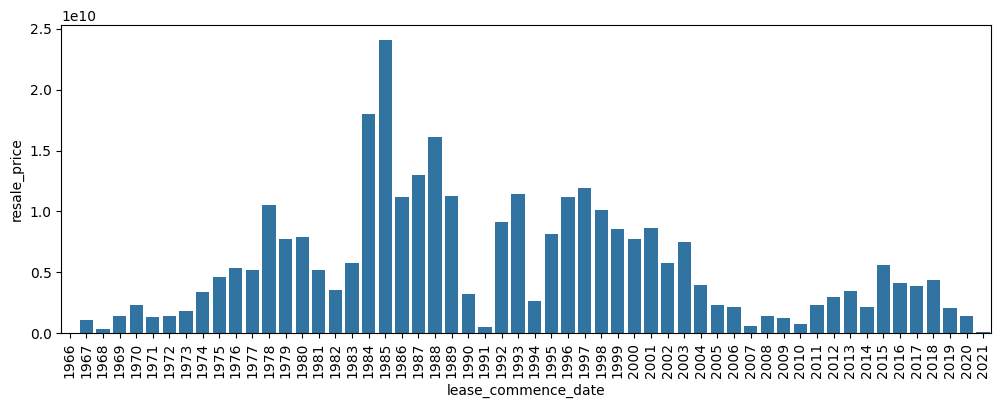

In [30]:
plt.figure(figsize=(12,4))
a = df.groupby('lease_commence_date')['resale_price'].sum()
a = pd.DataFrame(a)
sns.barplot(data = a, x = a.index, y = 'resale_price')
plt.xticks(rotation=90)
plt.show()

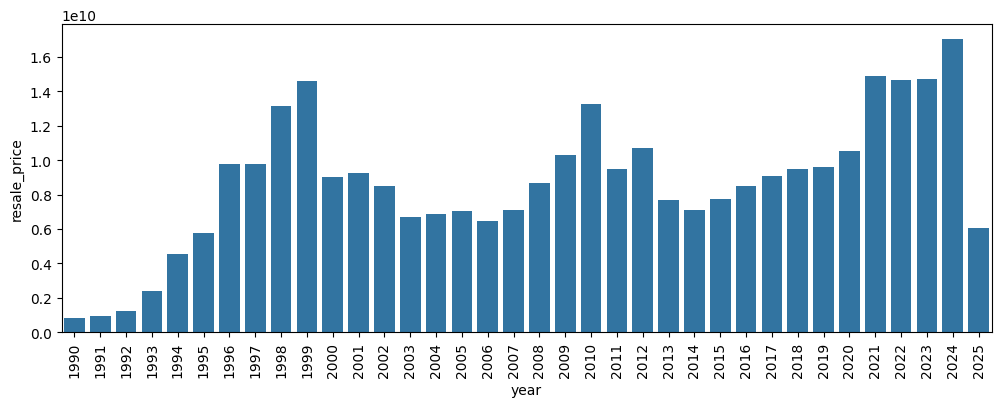

In [31]:
plt.figure(figsize = (12,4))
a = df.groupby('year')['resale_price'].sum()
a = pd.DataFrame(a)
sns.barplot(data = a, x = a.index, y ='resale_price')
plt.xticks(rotation=90)
plt.show()

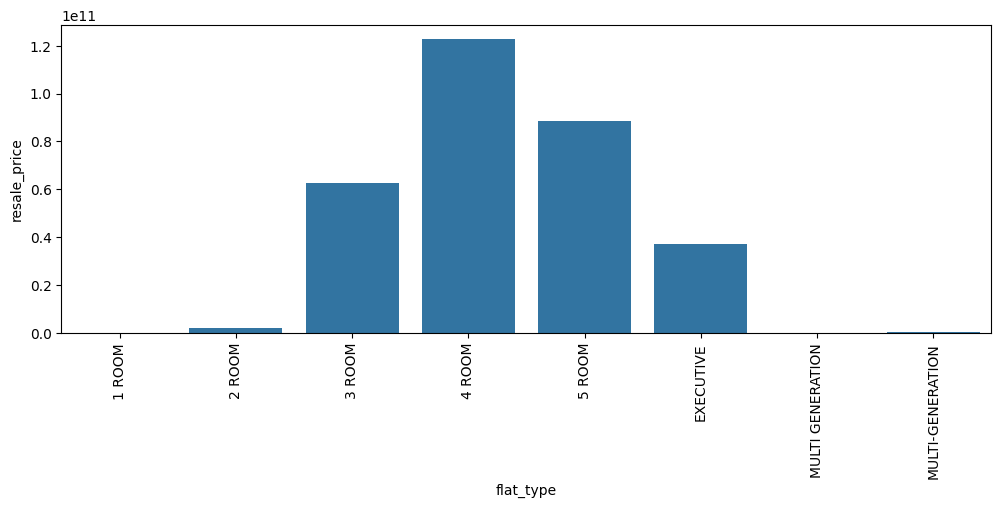

In [32]:
plt.figure(figsize = (12,4))
a = df.groupby('flat_type')['resale_price'].sum()
a = pd.DataFrame(a)
sns.barplot(data = a, x = a.index, y = 'resale_price')
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='year'>

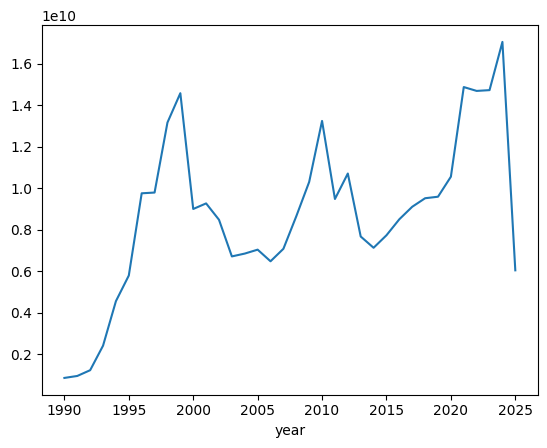

In [33]:
df.groupby('year').sum()['resale_price'].plot(kind='line')

<Axes: xlabel='lease_commence_date'>

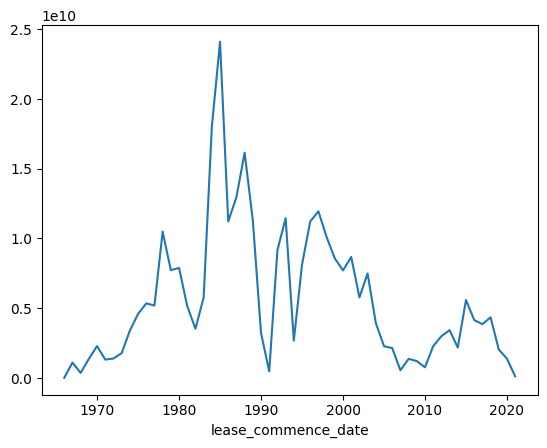

In [34]:
df.groupby('lease_commence_date').sum()['resale_price'].plot(kind='line')

In [35]:
scope_df = df[['floor_area_sqm','lease_commence_date','resale_price']]
scope_df

,floor_area_sqm,lease_commence_date,resale_price
0,31.0,1977,9000.0
1,31.0,1977,6000.0
2,31.0,1977,8000.0
3,31.0,1977,6000.0
4,73.0,1976,47200.0
...,...,...,...
952532,146.0,1988,1100888.0
952533,142.0,1987,988000.0
952534,146.0,1988,975000.0
952535,142.0,1988,1000000.0


In [36]:
scope_df = scope_df.drop_duplicates()
scope_df

,floor_area_sqm,lease_commence_date,resale_price
0,31.0,1977,9000.0
1,31.0,1977,6000.0
2,31.0,1977,8000.0
4,73.0,1976,47200.0
5,67.0,1977,46000.0
...,...,...,...
952532,146.0,1988,1100888.0
952533,142.0,1987,988000.0
952534,146.0,1988,975000.0
952535,142.0,1988,1000000.0


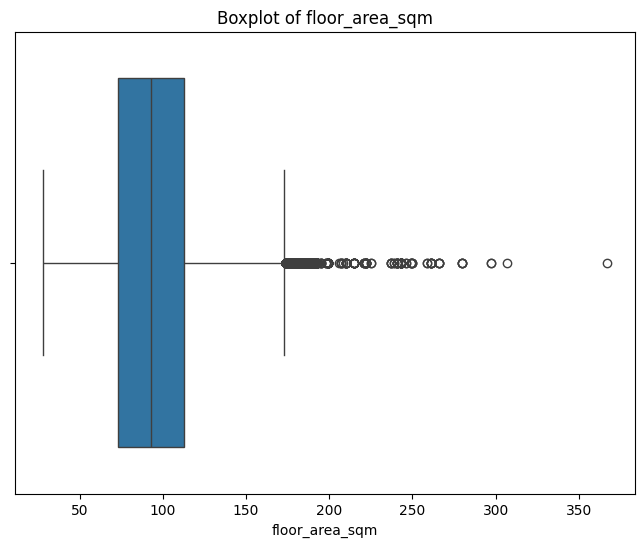

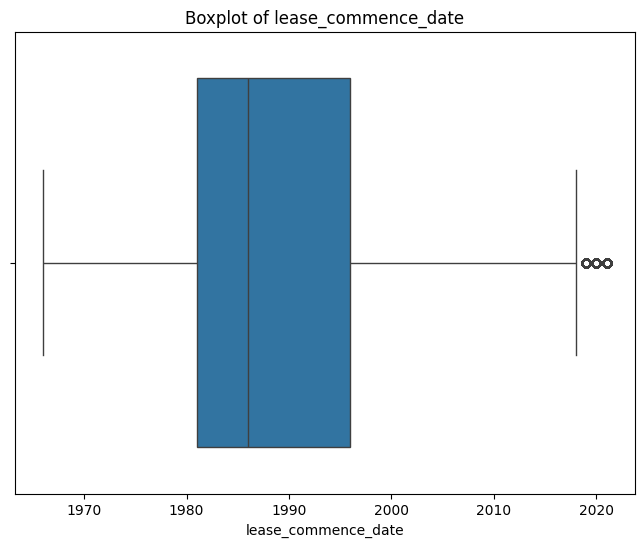

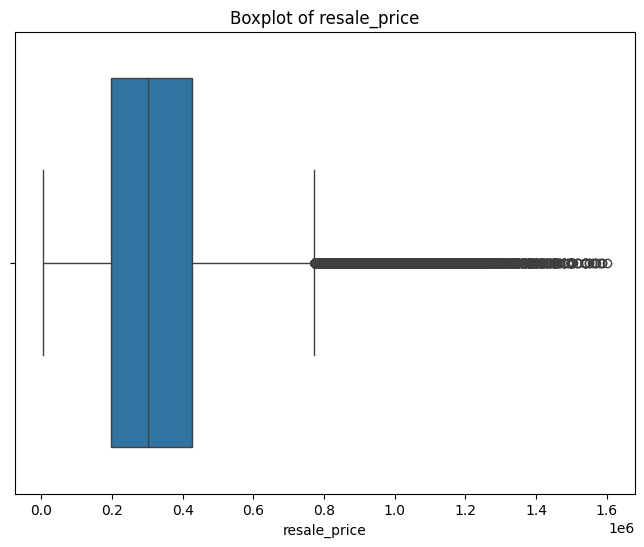

In [38]:
col = ['floor_area_sqm','lease_commence_date','resale_price']

for i in col:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

In [39]:
df1 = scope_df
df1

,floor_area_sqm,lease_commence_date,resale_price
0,31.0,1977,9000.0
1,31.0,1977,6000.0
2,31.0,1977,8000.0
4,73.0,1976,47200.0
5,67.0,1977,46000.0
...,...,...,...
952532,146.0,1988,1100888.0
952533,142.0,1987,988000.0
952534,146.0,1988,975000.0
952535,142.0,1988,1000000.0


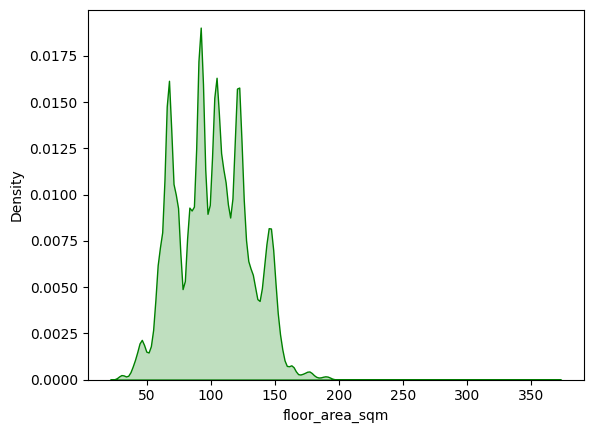

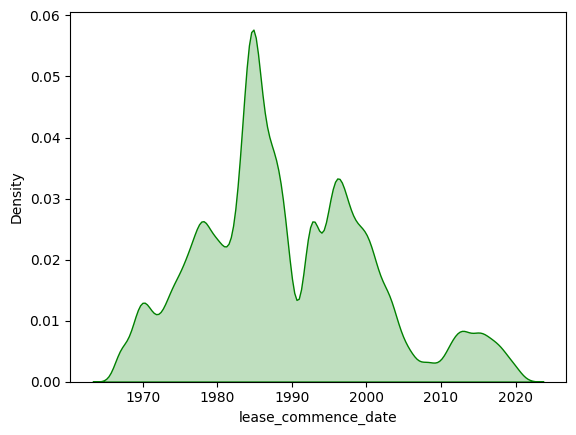

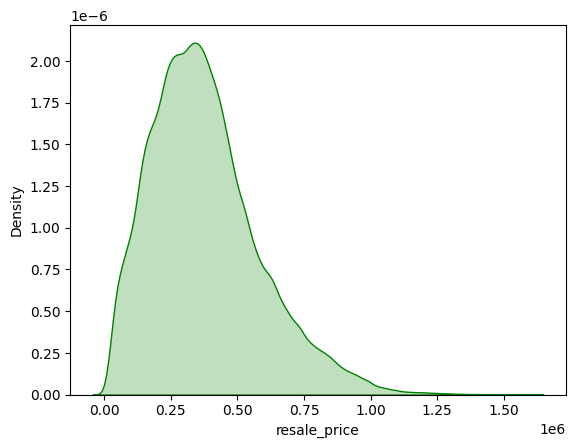

In [40]:
for i in df1.columns:
    sns.kdeplot(data=df1[i], fill=True, color="g")
    plt.show()

<Axes: title={'center': 'Correlation Heatmap'}>

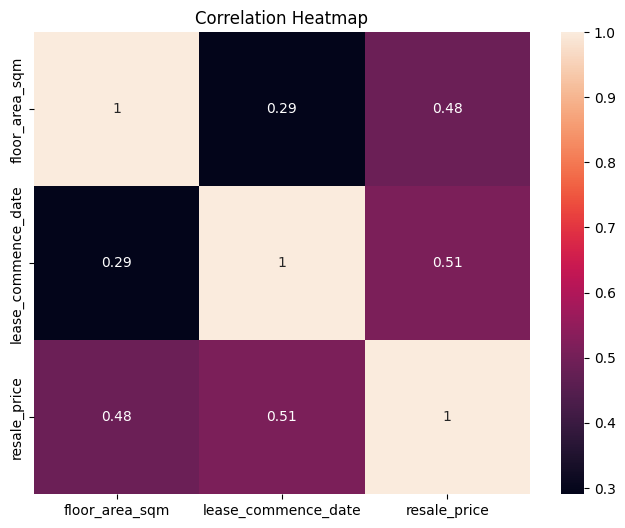

In [45]:
corrMatrix = df1.corr()
plt.figure(figsize=(8, 6))
plt.title("Correlation Heatmap")
sns.heatmap(corrMatrix,
            xticklabels=corrMatrix.columns,
            yticklabels=corrMatrix.columns,
            annot=True)


In [49]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

object_columns = df.select_dtypes(include=['object']).columns

df[object_columns] = df[object_columns].astype(str)

df[object_columns] = ordinal_encoder.fit_transform(df[object_columns])


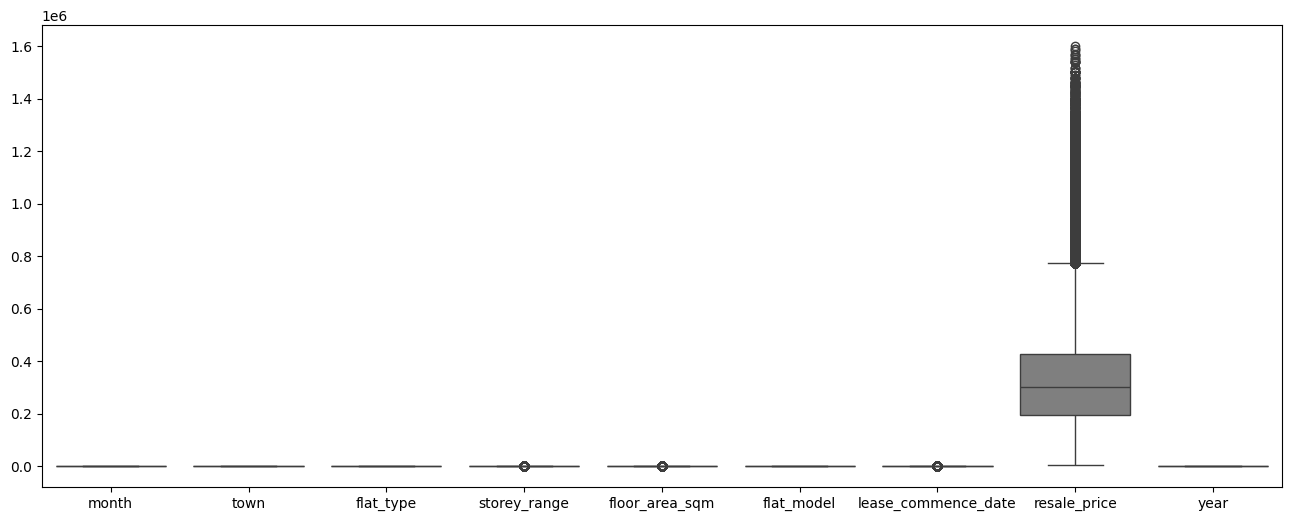

In [50]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df)
plt.show()

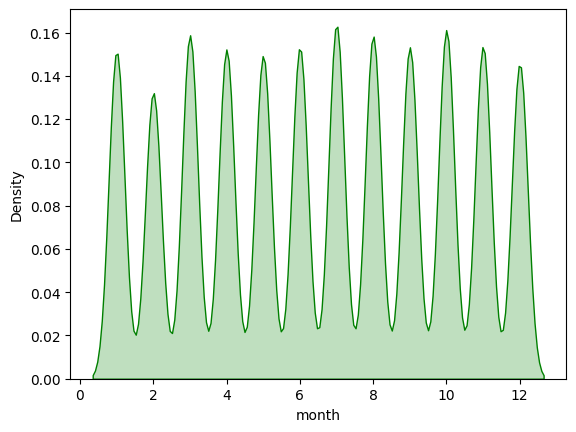

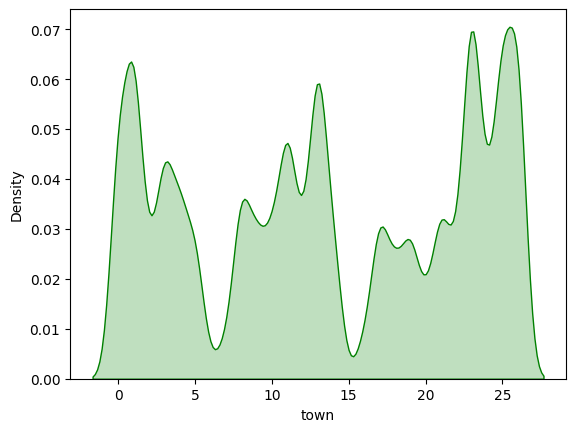

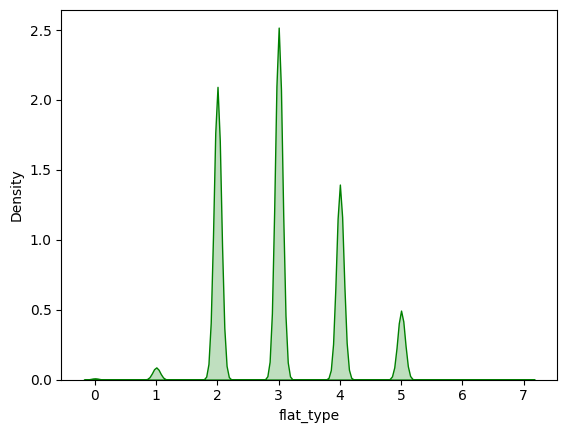

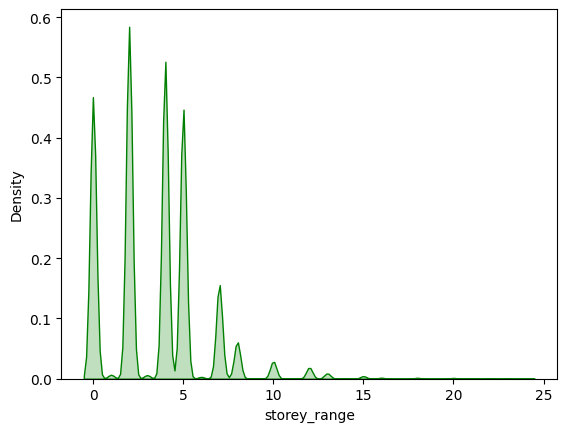

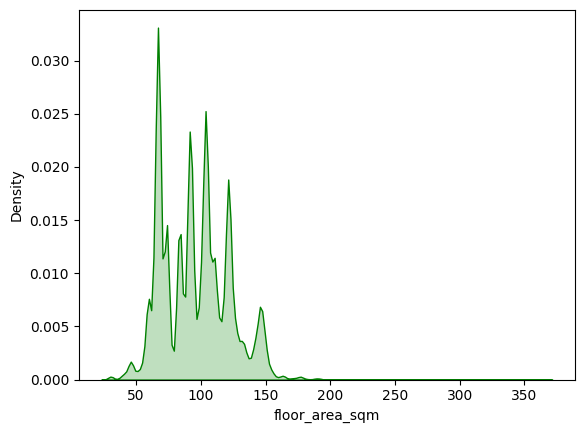

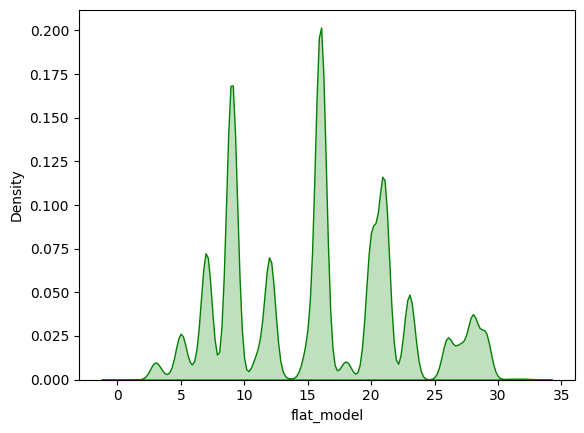

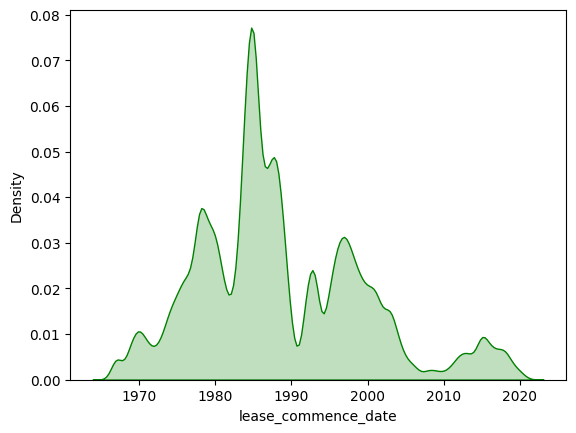

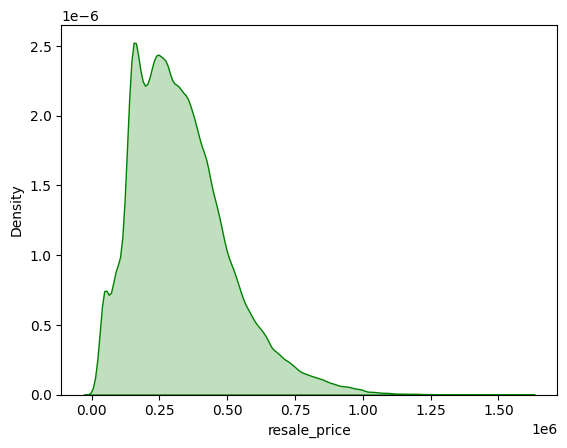

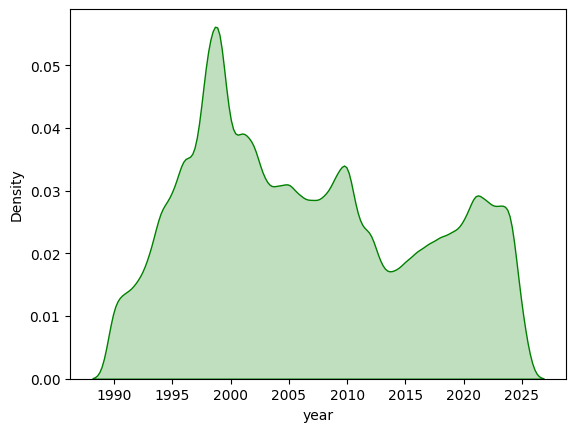

In [51]:
for i in df.columns:
    sns.kdeplot(data=df[i],fill=True,color="g")
    plt.show()

<Axes: title={'center': 'Correlation Heatmap'}>

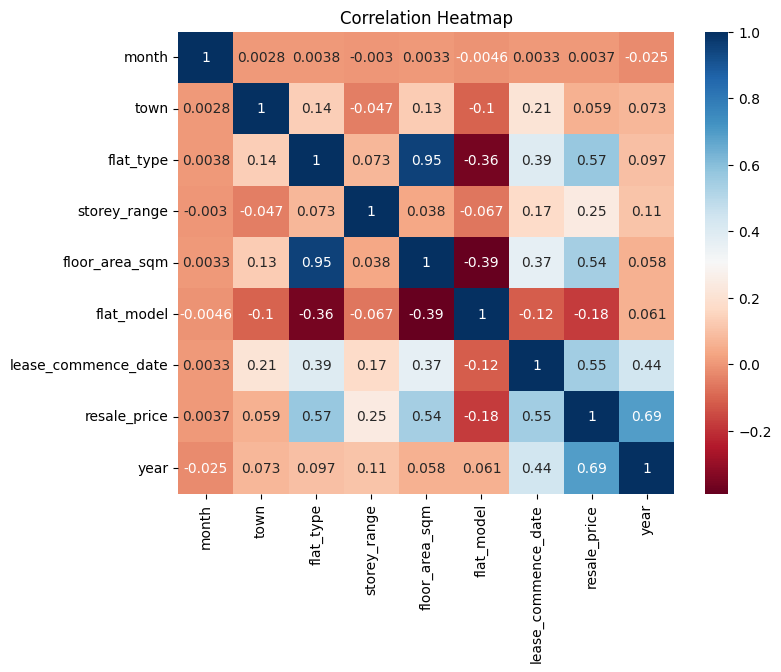

In [54]:
corrMatrix = df.corr()
plt.figure(figsize=(8,6))
plt.title("Correlation Heatmap")
sns.heatmap(corrMatrix,
            xticklabels=corrMatrix.columns,
            yticklabels= corrMatrix.columns,
            cmap='RdBu',
            annot=True)


In [55]:
df.drop(['town','flat_type','flat_model'],axis=1,inplace=True)

In [56]:
X = df.drop('resale_price',axis=1)
Y = df['resale_price']

In [57]:
X.head()

,month,storey_range,floor_area_sqm,lease_commence_date,year
0,1,5.0,31.0,1977,1990
1,1,2.0,31.0,1977,1990
2,1,5.0,31.0,1977,1990
3,1,4.0,31.0,1977,1990
4,1,2.0,73.0,1976,1990
